In [1]:
# # If running in google colab:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob, Word

In [2]:
# Read in data
data = pd.read_csv('../data/sentiment_df.csv')

# # Read in data from Google Colab. Update directory accordingly.
# data = pd.read_csv('/content/drive/MyDrive/Python/vectors_labels_df.csv')

In [3]:
data.head()

,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,text_length,word_length,km_label,dbscan_label,km_label_cvec,km_label_tvec,sentiment
0,CongressmanRaja,IL,Representative,Raja Krishnamoorthi,D,4845,"['tonight', 'president', 'stage', 'elaborate',...",'tonight' 'president' 'stage' 'elaborate' 'pho...,"[-0.2115751579, 0.39771672760000004, 0.0444499...",1623390,178283,1,0,0,1,0.079249
1,RepMcGovern,MA,Representative,James McGovern,D,3587,"['hell', 'Donald', 'Trump', 'think', 'teargass...",'hell' 'Donald' 'Trump' 'think' 'teargasse' 'p...,"[-0.20878361280000002, 0.39065130130000003, 0....",1313476,154634,1,0,0,1,0.100858
2,justinamash,MI,Representative,Justin Amash,L,3414,"['rioting', 'lootingthat', 'selfish', 'destruc...",'rioting' 'lootingthat' 'selfish' 'destructive...,"[-0.21580783520000002, 0.39001695140000003, 0....",811799,108476,1,-1,0,1,0.060343
3,ChrisMurphyCT,CT,Senator,Christopher Murphy,D,6349,"['important', 'American', 'chance', 'hear', 'n...",'important' 'American' 'chance' 'hear' 'networ...,"[-0.2116239752, 0.3956853959, 0.0479825345, -0...",2076035,264882,1,0,0,1,0.087599
4,NormaJTorres,CA,Representative,Norma Torres,D,3198,"['care', 'thank', 'continue', 'report', 'fire'...",'care' 'thank' 'continue' 'report' 'fire' 'imp...,"[-0.1967587812, 0.38218043020000003, 0.0433919...",1154739,132885,1,0,0,1,0.092814


In [5]:
# Create X
X_ = data['liststring']

cvec = CountVectorizer(max_features = 250, ngram_range = (1, 1))


X_c = pd.DataFrame(cvec.fit_transform(X_).toarray(), columns = cvec.get_feature_names())


In [18]:
data_ = data[['km_label_cvec']]
data_ = data_.join(X_c)

In [19]:
data_.head()

,km_label_cvec,access,act,action,address,administration,ago,allow,america,american,...,week,white,will,win,woman,work,worker,world,year,yesterday
0,0,35,326,73,138,220,58,100,91,305,...,223,158,80,56,98,334,134,100,285,88
1,0,97,391,138,59,194,74,69,218,258,...,178,77,52,35,89,408,112,116,249,42
2,0,20,194,78,43,50,37,106,54,77,...,67,45,60,51,5,176,32,19,177,13
3,0,50,309,133,55,253,117,148,264,255,...,288,238,130,346,51,439,138,144,412,88
4,0,96,204,67,68,116,33,55,90,178,...,177,58,44,24,178,344,169,51,224,32


In [20]:
# count the most frequently occuring words 

# dictionary to hold column header, count (key, value)
freq_words = {}

# loop through columns
for col in X_c.columns:
    
    # save sum of each column in dictionary
    freq_words[col] = X_c[col].sum()  
    
# save dictionary words in a dataframe
most_common = pd.DataFrame(sorted(freq_words.items(), key = lambda x: x[1], reverse = True))

most_common[:20]

,0,1
0,today,136868
1,work,128641
2,need,115104
3,trump,100434
4,help,100053
5,people,92826
6,act,92378
7,president,91200
8,thank,89566
9,community,88413


In [21]:
cluster_0 = data_.loc[data_['km_label_cvec'] == 0]

# count the most frequently occuring words 

# dictionary to hold column header, count (key, value)
freq_words = {}

# loop through columns
for col in cluster_0.columns:
    
    # save sum of each column in dictionary
    freq_words[col] = cluster_0[col].sum()  
    
# save dictionary words in a dataframe
most_common_0 = pd.DataFrame(sorted(freq_words.items(), key = lambda x: x[1], reverse = True))

most_common_0[:20]

,0,1
0,today,105011
1,work,101290
2,need,95138
3,trump,88466
4,help,78998
5,people,76404
6,act,75588
7,president,74882
8,health,71351
9,community,71267


In [22]:
cluster_1 = data_.loc[data_['km_label_cvec'] == 1]

# count the most frequently occuring words 

# dictionary to hold column header, count (key, value)
freq_words = {}

# loop through columns
for col in cluster_1.columns:
    
    # save sum of each column in dictionary
    freq_words[col] = cluster_1[col].sum()  
    
# save dictionary words in a dataframe
most_common_1 = pd.DataFrame(sorted(freq_words.items(), key = lambda x: x[1], reverse = True))

most_common_1[:20]

,0,1
0,today,31857
1,work,27351
2,thank,23990
3,help,21055
4,need,19966
5,great,18678
6,year,17610
7,house,17381
8,time,17161
9,community,17146


In [4]:
# Using TextBlob to find sentiment score for each politician's doc
# https://stackabuse.com/sentiment-analysis-in-python-with-textblob/
# https://towardsdatascience.com/aspect-based-sentiment-analysis-using-spacy-textblob-4c8de3e0d2b9

# data['sentiment'] = [TextBlob(i).sentiment.polarity for i in data['liststring']]

In [5]:
data.head(2)

,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,text_length,word_length,km_label,dbscan_label,km_label_cvec,km_label_tvec,sentiment
0,CongressmanRaja,IL,Representative,Raja Krishnamoorthi,D,4845,"['tonight', 'president', 'stage', 'elaborate',...",'tonight' 'president' 'stage' 'elaborate' 'pho...,"[-0.2115751579, 0.39771672760000004, 0.0444499...",1623390,178283,1,0,0,1,0.079249
1,RepMcGovern,MA,Representative,James McGovern,D,3587,"['hell', 'Donald', 'Trump', 'think', 'teargass...",'hell' 'Donald' 'Trump' 'think' 'teargasse' 'p...,"[-0.20878361280000002, 0.39065130130000003, 0....",1313476,154634,1,0,0,1,0.100858


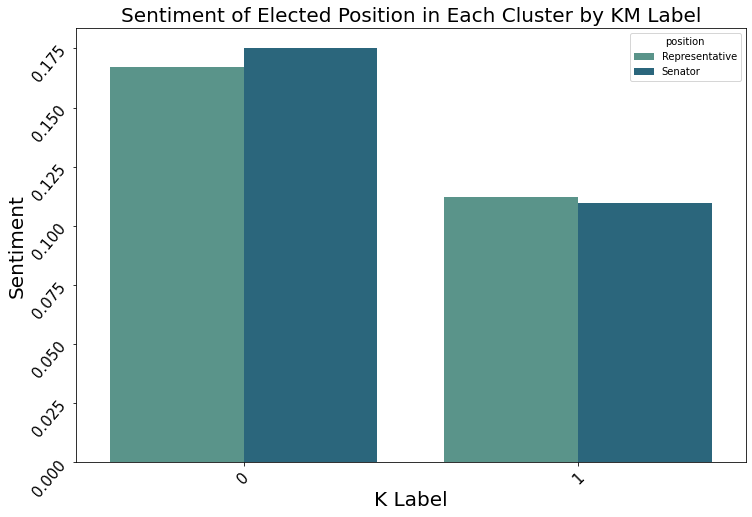

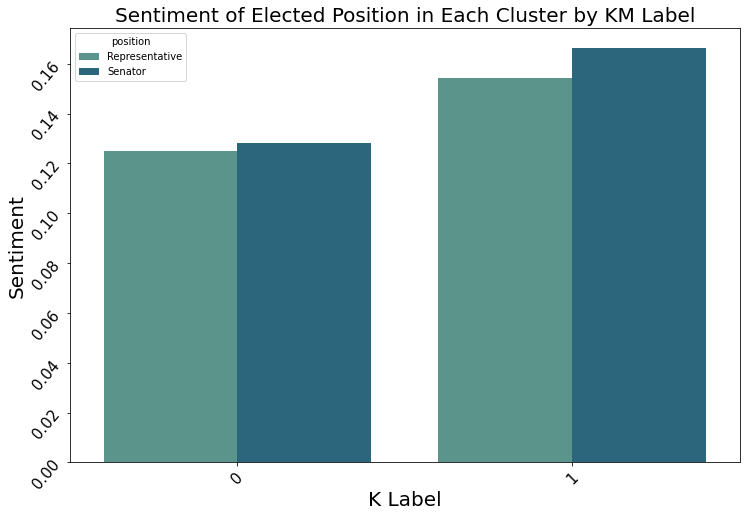

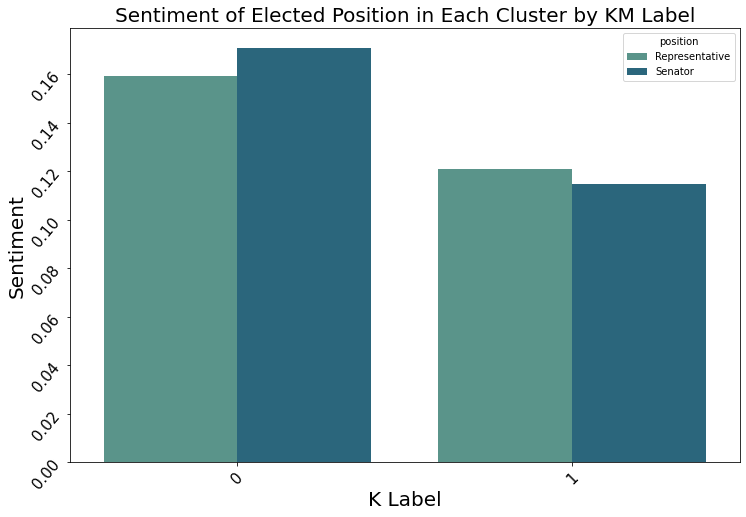

In [18]:
# SENTIMENT

plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x='km_label', 
            y='sentiment', 
            hue='position',
            palette = 'crest',
            data=data,
            ci = None,
#             order=data.sort_values('sentiment',ascending = False).km_label
           )

plt.title('Sentiment of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()



plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x='km_label_cvec', 
            y='sentiment', 
            hue='position',
            palette = 'crest',
            data=data,
            ci = None,
#             order=data.sort_values('sentiment',ascending = False).km_label
           )

plt.title('Sentiment of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()




plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x='km_label_tvec', 
            y='sentiment', 
            hue='position',
            palette = 'crest',
            data=data,
            ci = None,
#             order=data.sort_values('sentiment',ascending = False).km_label
           )

plt.title('Sentiment of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [7]:
data.groupby(['km_label', 'position']).agg(position_cnt =('position','count'))

position_cnt
km_label position                    
0        Representative           211
         Senator                   48
1        Representative           211
         Senator                   51

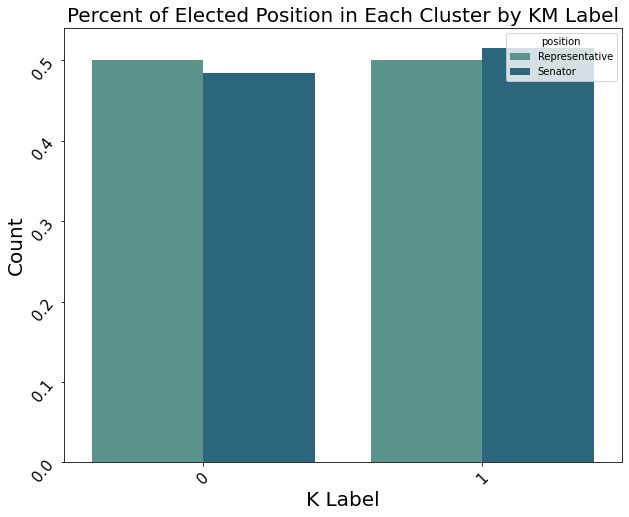

In [8]:
x, y, hue = 'km_label', 'proportion', 'position'
hue_order = ['Representative', 'Senator']

plt.figure(figsize=(10, 8))

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest',
#       order=plot_data.sort_values('proportion',ascending = False).x
      ))

plt.title('Percent of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()


In [9]:
def bar_plot(x_, y_, hue_, title_, xlabel_, ylabel_):
    x, y, hue = x_, y_, hue_
    
    plt.rcParams['figure.figsize'] = [12, 8]

    # hue_order = ['Representative', 'Senator']

    (data[x]
     .groupby(data[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

    
    plt.title(title_, fontsize=20)

    plt.xlabel(xlabel_, fontsize=20)
    plt.xticks(fontsize= 15, rotation=45)
    plt.ylabel(ylabel_, fontsize=20)
    plt.yticks(fontsize= 15, rotation=50)

    plt.show()

In [41]:
data.groupby(['km_label_cvec', 'position']).agg(position_cnt =('position','count'))

position_cnt
km_label_cvec position                    
0             Representative           213
              Senator                   65
1             Representative           209
              Senator                   34

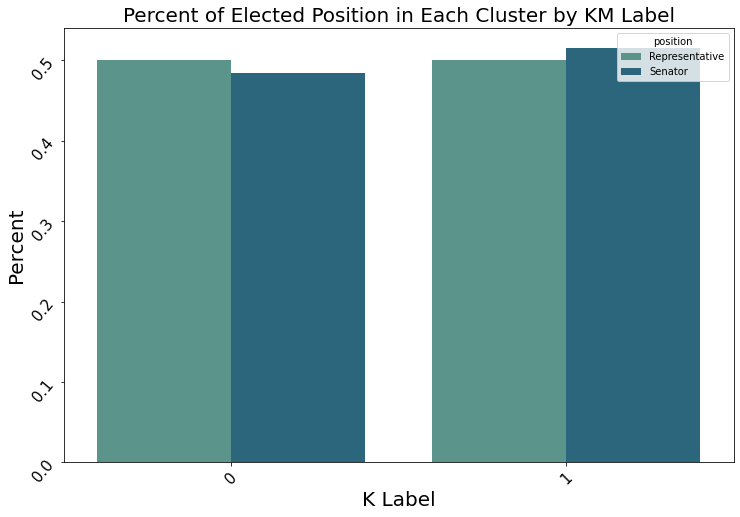

In [11]:
bar_plot('km_label', 'proportion', 'position', 'Percent of Elected Position in Each Cluster by KM Label', 'K Label', 'Percent')

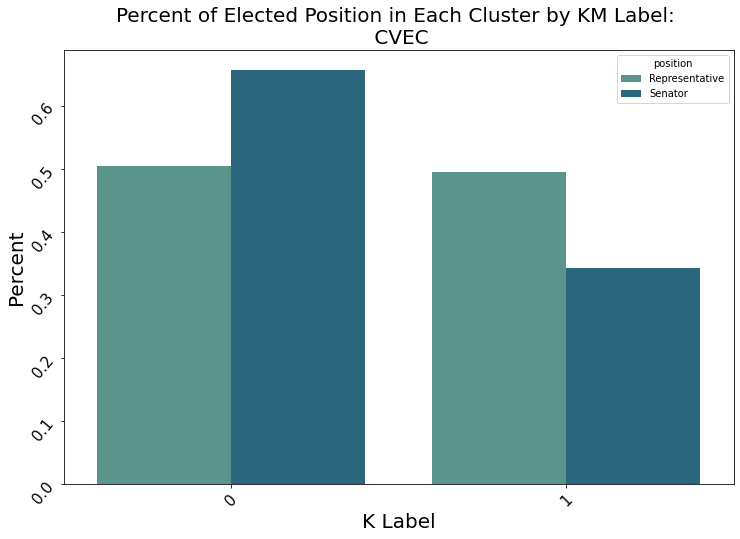

In [12]:
bar_plot('km_label_cvec', 'proportion', 'position', 'Percent of Elected Position in Each Cluster by KM Label: \n CVEC', 'K Label', 'Percent')

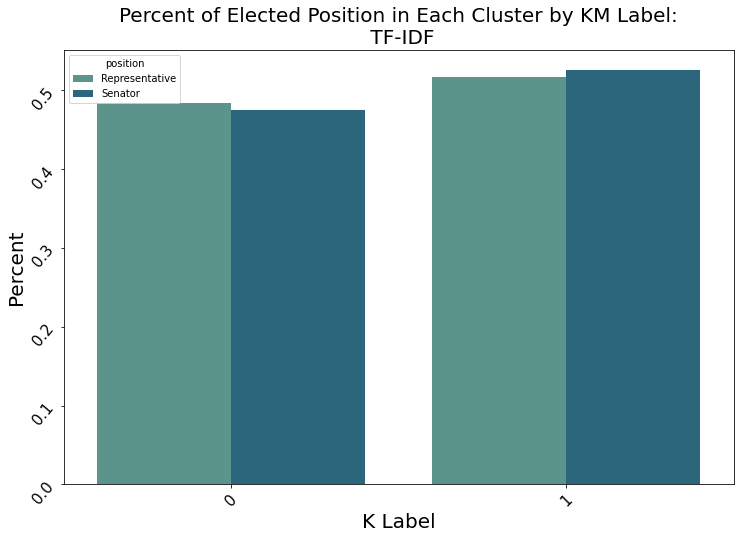

In [13]:
bar_plot('km_label_tvec', 'proportion', 'position', 'Percent of Elected Position in Each Cluster by KM Label:\n TF-IDF', 'K Label', 'Percent')

In [28]:
data.groupby(['km_label', 'party']).agg(position_cnt =('position','count'))

position_cnt
km_label party              
0        D               121
         R               138
1        D               156
         I                 2
         L                 1
         R               103

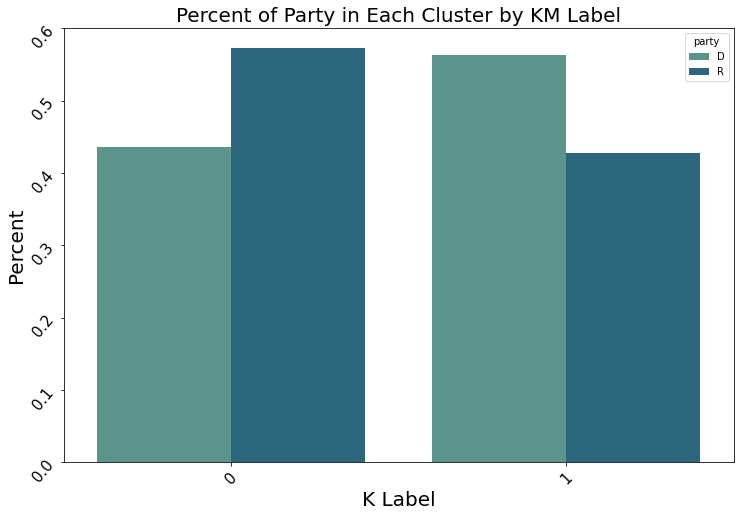

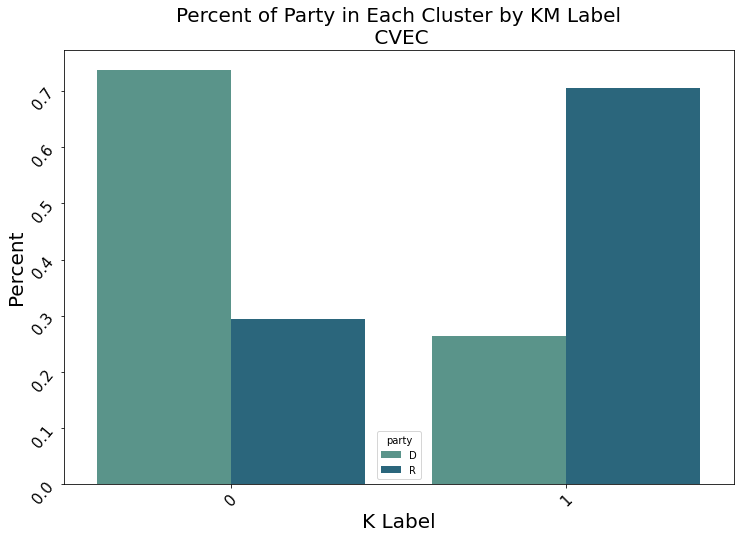

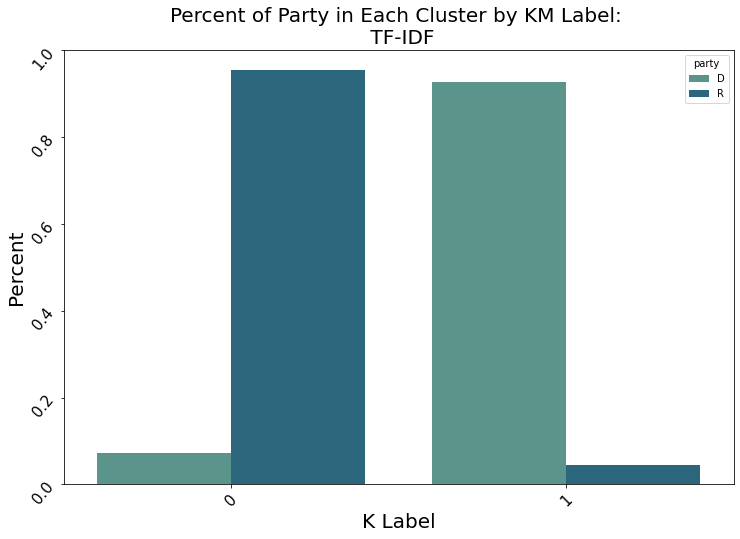

In [19]:
# POLITICAL PARTY

# HELP: https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
x, y, hue = 'km_label', 'proportion', 'party'
plt.rcParams['figure.figsize'] = [12, 8]

# hue_order = ['Representative', 'Senator']

# dropping independents and libertarians
# chart was difficult to read
df = data.drop(data[data.party == 'I'].index)
df = df.drop(df[df.party == 'L'].index)

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest',
#       order=df.sort_values(y,ascending = False).x
#        order=df['proportion']
#        order=order_list
      ))
plt.title('Percent of Party in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

####################

x, y, hue = 'km_label_cvec', 'proportion', 'party'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Party in Each Cluster by KM Label\n CVEC', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

####################

x, y, hue = 'km_label_tvec', 'proportion', 'party'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Party in Each Cluster by KM Label: \n TF-IDF', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

# bar_plot('km_label', 'proportion', 'party', 'Percent of Party in Each Cluster by KM Label', 'K Label', 'Percent')

In [42]:
data.groupby(['km_label_cvec', 'party']).agg(position_cnt =('party','count'))

position_cnt
km_label_cvec party              
0             D               204
              I                 2
              L                 1
              R                71
1             D                73
              R               170

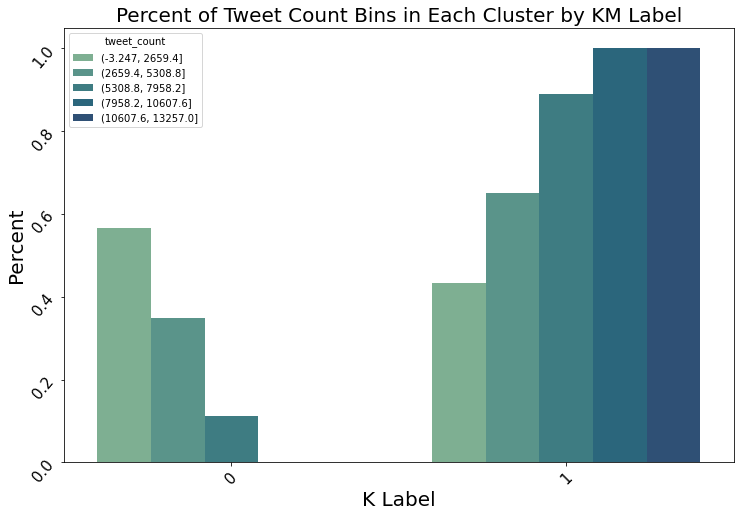

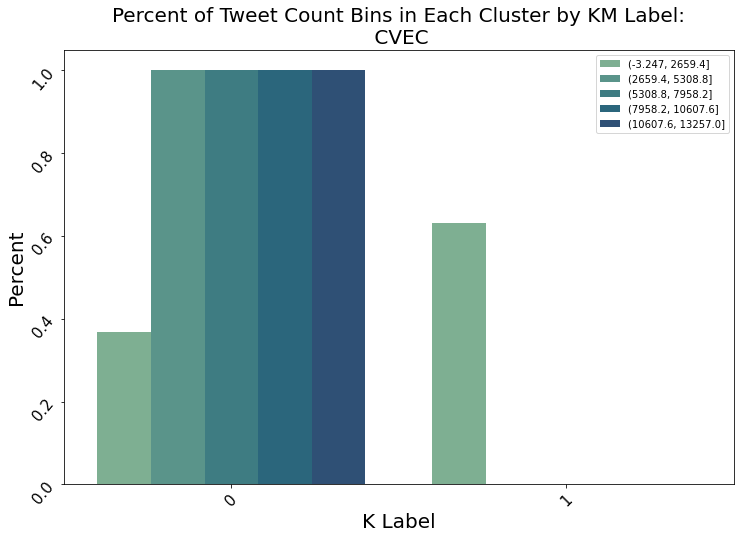

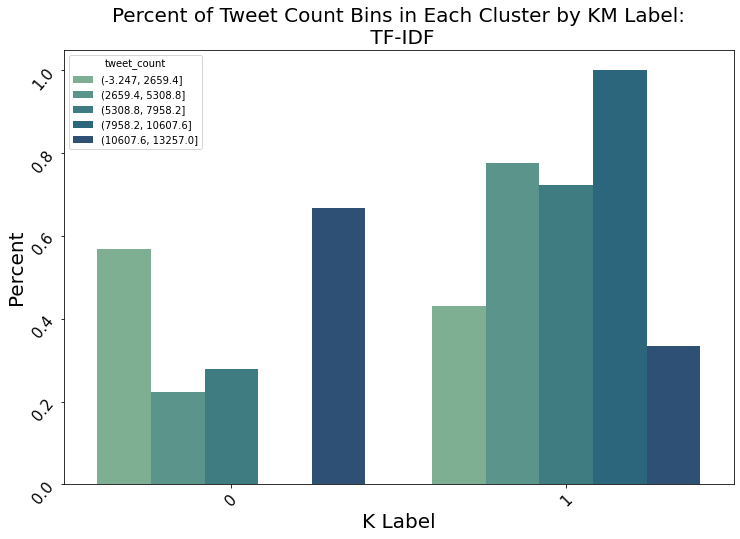

In [23]:
# NUMBER OF TWEETS

x, y, hue = 'km_label', 'proportion', 'tweet_count'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

bins = pd.cut(data['tweet_count'], bins=5)

(data[x]
 .groupby(bins)
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Tweet Count Bins in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()



x, y, hue = 'km_label_cvec', 'proportion', 'tweet_count'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(data[x]
 .groupby(bins)
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Tweet Count Bins in Each Cluster by KM Label:\n CVEC', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)
plt.legend(loc='upper right')

plt.show()




x, y, hue = 'km_label_tvec', 'proportion', 'tweet_count'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(data[x]
 .groupby(bins)
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Tweet Count Bins in Each Cluster by KM Label:\n TF-IDF', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [39]:
data.groupby(['km_label_cvec', bins]).agg(position_cnt =('km_label_cvec','count'))

position_cnt
km_label_cvec tweet_count                     
0             (-3.247, 2659.4]             142
              (2659.4, 5308.8]             112
              (5308.8, 7958.2]              18
              (7958.2, 10607.6]              3
              (10607.6, 13257.0]             3
1             (-3.247, 2659.4]             243
              (2659.4, 5308.8]               0
              (5308.8, 7958.2]               0
              (7958.2, 10607.6]              0
              (10607.6, 13257.0]             0